**Self-Assembly of a Dimer System -- Companion Notebook** 

# Additional Parameter Space Plots 

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import lambertw
import matplotlib.pyplot as plt
import warnings
import time

start_clock = time.time()

### Contents

**I.** Paramater Space Plots: $\beta E_0-\beta \Delta$ space

**II.** Paramater Space Plots: $V/\lambda_0^3-2N$ space

### I. Paramater Space Plots: $\beta E_0-\beta \Delta$ space

**- Boundary Lines for Phase Plot**

- Temperature I and Temperature II

$$ \sqrt{2} \,(\beta_{\text{I}} E_V)^{3/2} \,e^{\beta_{\text{I}}(E_0+\Delta)}  = N + {\cal O}(1) \qquad [ T_{\text{I}} \text{ definition}]$$

$$ e^{\beta_{\text{II}} \Delta} = 2N \qquad [ T_{\text{II}} \text{ definition}]$$

where $\beta_{\text{I, II}} = 1/k_BT_{\text{I, II}}$. 

- Boundary Lines
    - $T = T_{\text{I}}$ condition: $\displaystyle \beta \Delta = - \beta E_0 + \ln \left[ \frac{N}{ \sqrt{2}} \frac{1}{(\beta E_V)^{3/2}}\right]$

    - $T = T_{\text{II}}$ condition: $\beta \Delta = \ln (2N)$
        
    - $T_{\text{I}} = T_{\text{II}}$ condition: $\displaystyle \beta \Delta = \beta E_0 \,\frac{2}{3}\, \ln (2N) \left[W_{0}\left( \frac{E_0}{3 E_V}\right) \right]^{-1}$

where $E_V = h^2/2\pi m_0 V^{2/3}$ and $(\beta E_V)^{3/2} = \lambda_0^3/V$. 

In [2]:
# functional form of T=TI constraint 
T1_line = lambda betaE0, Ev, T, N: - betaE0 + (1.5)*np.log(1.0/(Ev/T)*(N/(np.sqrt(2)))**(2/3))

# functional form of T = TII constraint
T2_line = lambda betaE0, Ev, T,  N: np.log(2*Nelem)*np.ones(len(betaE0))

# functional form of TI=TII constraint
T1_T2_line = lambda betaE0, Ev, T, N: (2*np.log(2*N)*betaE0/3)/(lambertw(betaE0/(3*Ev/T)).real)

**- Equations for $\Delta$ and $E_0$ as functions of $\langle k \rangle$ and $\langle m \rangle$**


From the system of equations 

\begin{equation}
\frac{e^{\beta \Delta}}{2} = \langle m \rangle \frac{N-\langle m \rangle(1- e^{-\beta \Delta})}{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}, \qquad  \frac{4\sqrt{2}\,\lambda_0^3}{V}\,e^{\beta E_0} = \frac{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}{\big(N - \langle k \rangle\big)^2}
\end{equation}

we can solve for $\beta \Delta$ in the first equation to find 
$$
\beta \Delta = \ln\left[\frac{1}{2A} \left( B + \sqrt{B^2 + 4 A C  } \right) \right]$$

where 
\begin{eqnarray}
A & = & \frac{\langle k \rangle - \langle m \rangle}{2}\\
B & = & \langle m \rangle(N- \langle m \rangle) - \langle m \rangle/2\\
C & = & \langle m \rangle^2
\end{eqnarray}

Solving for $\beta E_0$ in the second equation gives us 

$$ \beta E_0 = \ln \left[ \frac{V}{4\sqrt{2}\lambda_0^3}\frac{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}{\big(N - \langle k \rangle\big)^2} \right]$$

where $\beta \Delta$ is given by the above function. 



In [3]:
## Del function given m, k, and system paramaters
def betaDelfunc(m, k, N):
            
    A = (k-m)/2
    
    B = m*(N-m)-m/2
    
    C = m**2
    
    
    return  np.log((B+np.sqrt(B**2 +4*A*C))/(2*A))

betaDelfunc = np.vectorize(betaDelfunc)

## E0 function given m, k, and system paramaters
def betaE0func(m, k, Ev, T, N):
    
    betaDel = betaDelfunc(m, k, N)
        
    return  np.log((k-m*(1-np.exp(-betaDel)))/(N-k)**2/(4*np.sqrt(2)*(Ev/T)**(3/2)))

betaE0func = np.vectorize(betaE0func)

**- Boundary line for Fully Correct Assembly ($T = T_c$)**

From imposing the $\langle k \rangle = \langle m \rangle$ condition on the above system of equations, we obtain 
$$ 
\frac{\sqrt{2}\, \lambda_{0,c}^3}{V} \,e^{\beta_c(E_0 + \Delta)} \left(1- 2N e^{-\beta_c \Delta}\right)^2 = (N-1/2)(1-e^{-\beta_{c} \Delta})
$$

Solving for $\beta \Delta$ as a function of $\beta E_0$, we find 

$$ \beta \Delta = \ln\left\{ \frac{1}{2} \left[\frac{1}{A} + 4N \left(1 + \sqrt{ \left(1 + \frac{1}{4NA}\right)^2 - \left(1 + \frac{1}{4N^2A^2}\right)} \right) \right]\right\}$$

where 

$A \equiv \sqrt{2}\,\lambda_{0}^3 e^{\beta E_0}/V(N-1/2)$. 

In [4]:
# boundary line for fully correct assembly

def betaDelforE02(betaE0, Ev, T,  N):
    
    A = np.sqrt(2)*np.exp(betaE0)*(Ev/T)**(3/2)/(N-1/2)

    Q = 0.5*(1/A + 4*N*(1+np.sqrt((1+1/(4*N*A))**2-(1+1/(4*N**2*A))) ) )
        
    return  np.log(Q)

betaDelforE02 = np.vectorize(betaDelforE02)

#### $\beta E_0$-$\beta \Delta$ parameter space

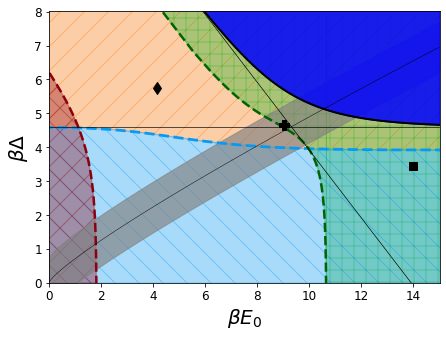

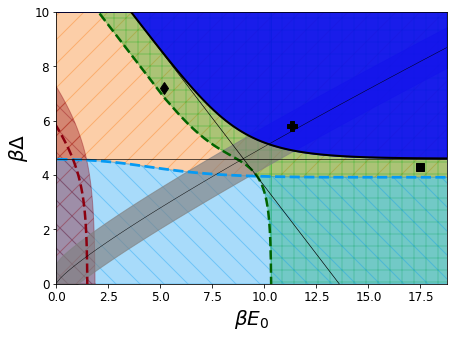

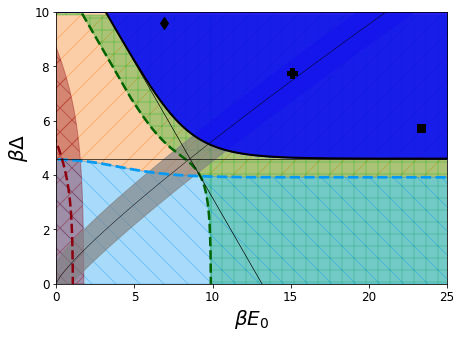

In [5]:
## Parameter Space Plot

## Parameter Values 
E0_max = 15.0
Del_max = 8.0
Temp= 1.0
Ev = 0.001
Nelem =50

for Temp in [1.0, 0.8, 0.6]:
    
    fig = plt.figure(figsize = (7,5))

    ## Line for m = (0.5)k 
    kvals = np.linspace(0.05,0.999999999*Nelem,100)
    mvals = .50*kvals
    plt.plot(betaE0func(mvals, kvals, Ev, Temp, Nelem), betaDelfunc(mvals, kvals, Nelem), linestyle='--', color='xkcd:azure',linewidth = 2.75)

    ## Fill-between line for m = (0.5)k and top
    kvals = np.linspace(0.05,0.999999999*Nelem,100)
    mvals = .50*kvals
    plt.fill_between(betaE0func(mvals, kvals, Ev, Temp, Nelem), 
                     betaDelfunc(mvals, kvals, Nelem),
                     10.0, color='xkcd:orange', hatch='/', alpha=0.35)

    ## Line for k = (0.95)N 
    kval = Nelem*0.95
    mvals = np.linspace(0.0005,kval-0.0000000001,200)
    kvals = np.ones(200)*kval
    plt.plot(betaE0func(mvals, kvals, Ev, Temp, Nelem), betaDelfunc( mvals, kvals, Nelem), linestyle='--', color='darkgreen',  linewidth = 2.5)

    ## E0 value where Del = 0 
    betaE0_Delzero = np.log((0.95*Nelem)/(Nelem-0.95*Nelem)**2/(4*np.sqrt(2)*(Ev/Temp)**(3/2)))

    ## Fill-between line for k = (0.95)N and top; from E0 = 0 to E0 value where Del =0
    kval = Nelem*0.95
    mvals = np.linspace(0.0005,kval-0.0000000001,200)
    kvals = np.ones(200)*kval
    plt.fill_between(betaE0func(mvals, kvals, Ev, Temp, Nelem), 
                     betaDelfunc(mvals, kvals,Nelem),
                     betaE0_Delzero, color='xkcd:green', hatch='+', alpha=0.35)

    ## Fill-between line for k = (0.95)N and top ; from E0 value where Del=0 to E0 = 15
    betaE0_start = max(betaE0func(mvals, kvals, Ev, Temp, Nelem)[1:])
    betaE0_vals2 = np.linspace(betaE0_start+.01, E0_max/Temp, Nelem)
    plt.fill_between(betaE0_vals2, 0.0, betaE0_Delzero, color='xkcd:green', hatch='+', alpha=0.35)


    ## Fill-between line for bottom and m = (0.5)k
    kvals = np.linspace(0.05,0.999999999*Nelem,100)
    mvals = .50*kvals
    plt.fill_between(betaE0func(mvals, kvals,Ev, Temp, Nelem), 
                     0.0, betaDelfunc(mvals, kvals,Nelem), 
                     color='xkcd:azure', hatch='\\', alpha=0.35)


    ## Line for k = (0.05)N 
    kval = Nelem/20
    mvals = np.linspace(.00005,kval-0.000015,100)
    kvals = np.ones(100)*kval
    plt.plot(betaE0func(mvals, kvals, Ev, Temp, Nelem), 
             betaDelfunc(mvals, kvals, Nelem), 
             color='xkcd:crimson', linestyle='--', linewidth = 2.5)


    ## Fill-between line for k = (0.05)N and bottom
    kval = Nelem/20
    mvals = np.linspace(.005,kval-0.000015,100)
    kvals = np.ones(100)*kval
    plt.fill_between(betaE0func(mvals, kvals, Ev, Temp, Nelem)/Temp,
                     0.0, betaDelfunc(mvals, kvals, Nelem)/Temp, 
                     color='xkcd:crimson', hatch='x', alpha=0.35)


    # full spectrum of energy values
    betaE = np.linspace(0.01, E0_max/Temp, 100) 

    # plot of fully-correct assembly boundary
    plt.plot(betaE, betaDelforE02(betaE, Ev, Temp, Nelem), linewidth = 2.0, color='xkcd:black')

    # plot of TI, TII, TII = TI lines
    plt.plot(betaE, T1_line(betaE,Ev, Temp, Nelem ), color = 'k', linestyle='-', linewidth = .65)
    plt.plot(betaE, T2_line(betaE,Ev, Temp, Nelem ), color = 'k', linestyle='-', linewidth = .65)
    plt.plot(betaE, T1_T2_line(betaE, Ev, Temp, Nelem ), color = 'k', linestyle='-', linewidth = 0.45)

    # Line for TypeI and Type II ambiguous region
    plt.fill_between(betaE,  T1_T2_line(betaE, Ev, Temp, Nelem )-0.75*np.ones(100),   T1_T2_line(betaE, Ev, Temp, Nelem )+0.75*np.ones(100) , color = 'grey',  alpha=.65)

    # Region for Fully Correct Dimerization
    plt.fill_between(betaE, betaDelforE02(betaE, Ev, Temp, Nelem) ,  10.0 , color = 'blue',  alpha=0.85)

    # markers for the points corresponding to the simulation and numerical results plots
    plt.plot( 4.15/Temp, 5.75/Temp,  marker='d', markersize=9, color="black")
    plt.plot(9.05/Temp, 4.65/Temp, marker='P', markersize=10, color="black")
    plt.plot(14.0/Temp, 3.45/Temp, marker='s', markersize=8, color="black" )

    # axis labels
    plt.xlabel(r'$\beta E_0$', fontsize = 20)
    plt.ylabel(r'$\beta \Delta$', fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax = plt.gca()
    ax.set_xlim([0,min((E0_max)/Temp+.02, 25)])
    ax.set_ylim([0,min((Del_max)/Temp+.02, 10)])

    warnings.simplefilter("ignore")

    #plt.savefig("./delE0_new_phase.png", bbox_inches='tight')

    plt.show()

----

----

### II. Paramater Space and Phase Plots: $V/\lambda_0^3-2N$ space

**- Boundary Lines for Phase Plot**

- Temperature I and Temperature II

$$ \frac{\sqrt{2} \,\lambda_{0, \text{I}}^3}{V} \,e^{\beta_{\text{I}}(E_0+\Delta)}  = N -1/2  \qquad [ T_{\text{I}} \text{ definition}]$$

$$ e^{\beta_{\text{II}} \Delta} = 2N \qquad [ T_{\text{II}} \text{ definition}]$$


where $\beta_{\text{I}} = 1/k_BT_{\text{I}}$ and $\lambda_{0, \text{II}} = h/\sqrt{2\pi m_0 k_BT_{\text{II}}}$

- Boundary Lines
    - $T = T_{\text{I}}$ condition: $\displaystyle 2N = 1+ 2 \sqrt{2}\,(\beta E_V)^{3/2}e^{\beta (\Delta+E_0)}$
        
    - $T = T_{\text{II}}$ condition: $2N = e^{\beta \Delta}$
       
    - $T_{\text{I}} = T_{\text{II}}$ condition: $\displaystyle  2N = \exp\left[\frac{3\Delta}{2E_0} W_{0} \left(\frac{E_0}{3E_V}\right)\right]$

where $E_V = h^2/2\pi m_0 V^{2/3}$ and $(\beta E_V)^{3/2} = \lambda_0^3/V$. 

In [6]:
# functional form of T=TI constraint
twoN_T1_line = lambda Vlam3, T, E0, Del: 2*np.sqrt(2)*np.exp((E0+Del)/T)/(Vlam3)+1

# functional form of T = TII constraint
twoN_T2_line = lambda Vlam3, T, E0, Del: np.exp(Del/T)*np.ones(len(Vlam3))

# functional form of TI=TII constraint
twoN_T1_T2_line = lambda Vlam3, T, E0, Del: np.exp(1.5*Del/E0*lambertw(E0/T*(Vlam3)**(2/3)/3))  

**- Equation for $2N$ as a function of $V/\lambda_0^3$ when $\langle m \rangle = \langle k \rangle/2$**

From the system of equations 

\begin{equation}
\frac{e^{\beta \Delta}}{2} = \langle m \rangle \frac{N-\langle m \rangle(1- e^{-\beta \Delta})}{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}, \qquad  \frac{4\sqrt{2}\,\lambda_0^3}{V}\,e^{\beta E_0} = \frac{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}{\big(N - \langle k \rangle\big)^2}
\end{equation}

we will set $\langle m \rangle = \langle k \rangle/2$. Using this condition to solve for $\langle k \rangle$ in the first equation, inserting this result into the second equation, and extensively rearranging, we are left with the condition

$$ H(x) = \frac{2N- e^{\beta\Delta}}{(2N- G)^2}$$

where $x = V/\lambda_0^3$ and 

$$ H(x) \equiv \frac{1}{x} \frac{2\sqrt{2}e^{\beta E_0}}{1-e^{-2\beta \Delta}}, \qquad G \equiv 2 \frac{e^{\beta \Delta}}{1+e^{-\beta \Delta}}.$$

Solving the $H(x) = (2N- e^{\beta\Delta})/(2N- G)^2$ condition, we then find that $2N$ as a function of $V/\lambda_0^3$ is 

$$ 2N(x) = G + \frac{1}{2H(x)} - \sqrt{\left( G + \frac{1}{2H(x)}\right)^2 - \left(G^2 + \frac{e^{\beta \Delta}}{H(x)}\right)}.$$

In [7]:
# code for equation
def twoN_mk50(T, Vlam3, E0, Del):
    
    H = (2*np.sqrt(2)*np.exp(E0/T))/Vlam3/(1-np.exp(-2*Del/T))
    
    G = 2*np.exp(Del/T)/(1+np.exp(-Del/T))
    
    B = G+1/(2*H)
    
    C = G**2 + np.exp(Del/T)/H
    
    return B - np.sqrt(B**2 - C)

**- Equation for $2N$ as a function of $V/\lambda_0^3$ when $\langle k \rangle = \gamma N$; $\gamma \in (0,1)$**

From the system of equations 

\begin{equation}
\frac{e^{\beta \Delta}}{2} = \langle m \rangle \frac{N-\langle m \rangle(1- e^{-\beta \Delta})}{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}, \qquad  \frac{4\sqrt{2}\,\lambda_0^3}{V}\,e^{\beta E_0} = \frac{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}{\big(N - \langle k \rangle\big)^2}
\end{equation}

we will set $\langle k \rangle = \gamma N$ and define $M \equiv \langle m \rangle (1-e^{-\beta \Delta})$ and $B \equiv (e^{\beta \Delta}-1)/2$. The new system of equations becomes 

\begin{equation}
B = M\frac{N-M}{\gamma N - M}, \qquad  \frac{4\sqrt{2}\,\lambda_0^3}{V}\,e^{\beta E_0} = \frac{\gamma N- M}{N^2(1-\gamma)^2}.
\end{equation}

Solving for $V/\lambda_0^3$ in the second equation gives us 

$$ \frac{V}{\lambda_0^3} = \frac{e^{-\beta E_0}}{4\sqrt{2}}\frac{N^2(1-\gamma)^2}{\gamma N- M(N)}$$

where $M(N)$ is given, from its solution in the first equation, by

$$ M(N) = \frac{1}{2}\left[ N+B - \sqrt{(N+B)^2 - 4 \gamma N B}\right].$$

We determine $2N$ as a function of $V/\lambda_0^3$, by using these two results to find $V/\lambda_0^3$ as a function of $N$ and then inverting the result. 

In [8]:
# code for equation
def Vlam3_kgamma(T, twoN, E0, Del, gamma):
    
    N = twoN/2
    
    B = (np.exp(Del/T)-1)/2 
    
    M = 0.5*(N+B - np.sqrt((N+B)**2 - 4*gamma*N*B))
    
    return (N**2*4*np.sqrt(2)*np.exp(E0/T)*(1-gamma**2))/(gamma*N-M)

Vlam3_kgamma = np.vectorize(Vlam3_kgamma)

**- Boundary line for Fully Correct Assembly ($T = T_c$)**

From imposing the $\langle k \rangle = \langle m \rangle$ condition on the above system of equations, we obtain 

$$ 
\frac{\sqrt{2}\, \lambda_{0,c}^3}{V} \,e^{\beta_c(E_0 + \Delta)} \left(1- 2N e^{-\beta_c \Delta}\right)^2 = (N-1/2)(1-e^{-\beta_{c} \Delta})
$$

Defining $$Q(x) \equiv \frac{1}{x} \frac{2\sqrt{2}\, e^{\beta\,(E_0-\Delta)}}{1-e^{-\beta \Delta}},$$ we find that $2N$ as a function of $x=V/\lambda_0^3$ is 

$$ 2N(x) = e^{\beta\Delta}+\frac{1}{2Q(x)} -\sqrt{ \left( e^{\beta\Delta}+\frac{1}{2Q(x)}\right)^2- \left( e^{2\beta\Delta}+\frac{1}{Q(x)}\right)}$$

In [9]:
# code for equation
def twoNforVlam3(Vlam3, T, E0, Del):
    
    Q = 2*np.sqrt(2)*np.exp((E0-Del)/T)/(Vlam3)/(1-np.exp(-Del/T))
    
    B = np.exp(Del/T) + 1/(2*Q)
    
    return B - np.sqrt(B**2 - (np.exp(2*Del/T) +1/Q))

twoNforVlam3 = np.vectorize(twoNforVlam3)

#### $V/\lambda_0^3$-$2N$ phase plot

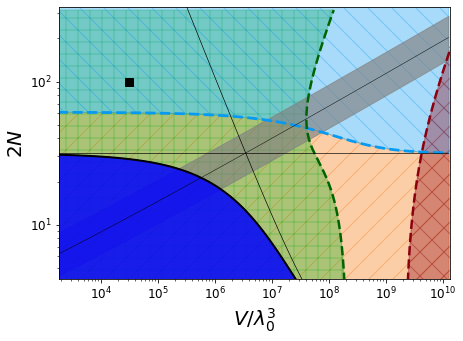

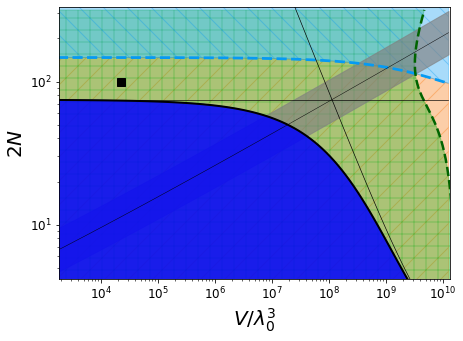

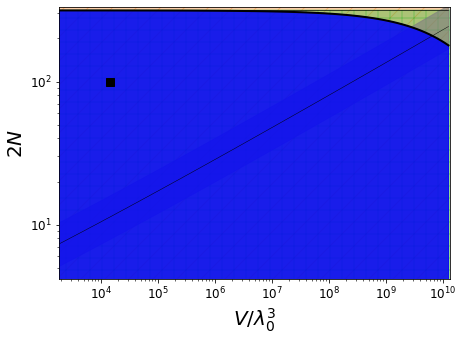

In [10]:
#limits of python plot
logVlam3min = 3.25
logVlam3max = 10.1
logNmin = 0.6
logNmax = 2.5

## parameters
E0 = 14.0
Del = 3.45

# Space of 2N and Vlam3 values
Vlam3vals = np.logspace(logVlam3min, logVlam3max,100)
logtwoNvals = np.logspace(logNmin, logNmax , 1000)


for Temp in [1.0, 0.8, 0.6]:
    
    fig = plt.figure(figsize = (7,5))


    # plot of m/k = 0.5 boundary
    plt.loglog(Vlam3vals, twoN_mk50(Temp,Vlam3vals, E0, Del), color='xkcd:azure', linestyle='--', linewidth = 2.75)
    # plot of k/N = 0.95 boundary
    plt.loglog(Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.95), logtwoNvals,color='darkgreen', linestyle='--', linewidth = 2.5)
    # plot of k/N = 0.05 boundary
    plt.loglog(Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.05), logtwoNvals,  color='xkcd:crimson', linestyle='--', linewidth = 2.5)


    # Fill-between bottom and m = 0.5 k line
    plt.fill_between(Vlam3vals,  
                     twoN_mk50(Temp,Vlam3vals, E0, Del), 
                     1e-6,
                     color='xkcd:orange', hatch='/', alpha=0.35)

    # Fill-between k= 0.95 N line and left 
    plt.fill_betweenx(logtwoNvals, 
                      1e-2,
                      Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.95), 
                      where=1e-21 <=  Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.95), 
                      color='xkcd:green', 
                      hatch='+', 
                      alpha=0.35)

    # Fill-between m= 0.5 k line and top
    plt.fill_between(Vlam3vals, 
                     1e8, 
                     twoN_mk50(Temp,Vlam3vals, E0, Del), 
                     color='xkcd:azure', hatch='\\', alpha=0.35)

    # Fill-between k= 0.05 N line and right 
    plt.fill_betweenx(logtwoNvals, 
                      Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.05), 
                      1e14, where=1e14 >=  Vlam3_kgamma(Temp, logtwoNvals, E0, Del, 0.05), 
                      color='xkcd:crimson', 
                      hatch='x', 
                      alpha=0.35)


    # plot of fully-correct assembly boundary
    plt.loglog(Vlam3vals, twoNforVlam3(Vlam3vals, Temp, E0, Del),  color='xkcd:black', linewidth = 2.00)

    #plots of T=TI, T=TII, and TI=TII lines 
    plt.loglog(Vlam3vals, twoN_T1_line(Vlam3vals, Temp,  E0, Del), color = 'k', linestyle='-', linewidth = 0.65)
    plt.loglog(Vlam3vals, twoN_T2_line(Vlam3vals,Temp,  E0, Del), color = 'k', linestyle='-', linewidth = 0.65)
    plt.loglog(Vlam3vals, twoN_T1_T2_line(Vlam3vals, Temp,  E0, Del), color = 'k', linestyle='-', linewidth = 0.45)

    # Line for TypeI and Type II ambiguous region
    plt.fill_between(Vlam3vals,  twoN_T1_T2_line(Vlam3vals, Temp,  E0, Del)*np.exp(-.35),   twoN_T1_T2_line(Vlam3vals, Temp,  E0, Del)*np.exp(.35) , color = 'grey',  alpha=.65)

    # Fill fully-correct assembly region
    plt.fill_between(Vlam3vals, 
                     twoNforVlam3(Vlam3vals, Temp,  E0, Del),
                     1e-6, 
                     color = 'blue',  
                     alpha=0.85)


    # markers for the points corresponding to the simulation and numerical results plots
    plt.plot((0.001/Temp)**(-3/2), 100,  marker='s', markersize=8, color="black"); #V/lamda^3 = (0.001)^(-3/2), 2N = 100

    # axis limits
    ax = plt.gca()

    ax.set_xlim([10**(logVlam3min)*(1.05),10**(logVlam3max)*(1.05)])
    ax.set_ylim([10**(logNmin)*(1.05),10**(logNmax)*(1.05)])

    plt.tick_params(axis='both', which='major', labelsize=12)

    # axis labels
    plt.xlabel(r'$V/\lambda_0^3$', fontsize = 20)
    plt.ylabel(r'$2N$', fontsize = 20)

    #plt.savefig("./2NVlam3_new_phase.png", bbox_inches='tight')

    plt.show()

In [11]:
print('Elapsed Time: %.3f sec' % (time.time()-start_clock))

Elapsed Time: 2.795 sec
